<img src="https://logosmarcas.net/wp-content/uploads/2020/04/YouTube-S%C3%ADmbolo.jpg" alt="Logo do YouTube" width="100"/>


---

## Análise dos Dados do YouTube

Esta análise envolve a exploração de um conjunto de dados unificado que reúne informações de vídeos tendência do YouTube de várias regiões, incluindo Canadá, Alemanha, França, Grã-Bretanha, Índia, Japão, Coreia do Sul, México, Rússia e Estados Unidos. O conjunto de dados abrange uma ampla gama de métricas, como visualizações, curtidas, descurtidas, contagem de comentários, e informações de publicação como data e hora.

---

In [29]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline

---

### Criação dos DataFrames

Para iniciar a análise dos vídeos tendência do YouTube, carregamos dados de dez países (Canadá, Alemanha, França, Grã-Bretanha, Índia, Japão, Coreia do Sul, México, Rússia e Estados Unidos) em DataFrames separados. Utilizamos a codificação 'UTF-8' para garantir a leitura adequada dos arquivos CSV, contornando problemas de decodificação de caracteres.
Não foi utilizado o CHARTED (Biblioteca), por que ele mostra o encoding, mais mesmo assim dependendo de como esse arquivo foi salvo dará erro, então melhor usar a função abaixo e caso não der certo, alterar no próprio VsCode o tipo do encoding.

---

In [39]:
#Função para testar os encoding, caso não der certo. Abrir o arquivo no vscode, ir na barra inferior e alterar manualmente o encoding para utf-8, clicando em save  with encoding.

try_encodings = ['UTF-8', 'ISO-8859-1']

for enc in try_encodings:
    try:
        df_japao = pd.read_csv('base_dados/JPvideos.csv', encoding=enc)
        print(f"Arquivo lido com sucesso usando o encoding: {enc}")
        break
    except UnicodeDecodeError as e:
        print(f"Erro ao tentar ler com {enc}: {e}")

Arquivo lido com sucesso usando o encoding: UTF-8


In [37]:
df_canada  = pd.read_csv('base_dados/CAvideos.csv', encoding='utf-8')
df_alemanha  = pd.read_csv('base_dados/DEvideos.csv', encoding='utf-8')
df_franca  = pd.read_csv('base_dados/FRvideos.csv', encoding='utf-8')
df_granBetanha  = pd.read_csv('base_dados/GBvideos.csv', encoding='utf-8')
df_india  = pd.read_csv('base_dados/INvideos.csv', encoding='utf-8')
df_estadosUnidos  = pd.read_csv('base_dados/USvideos.csv', encoding='utf-8')
df_mexico  = pd.read_csv('base_dados/MXvideos.csv', encoding='ISO-8859-1')
df_japao  = pd.read_csv('base_dados/JPvideos.csv', encoding='utf-8')
df_coreiaSul  = pd.read_csv('base_dados/KRvideos.csv', encoding='utf-8')
df_russia  = pd.read_csv('base_dados/RUvideos.csv', encoding='utf-8')
df_mexico  = pd.read_csv('base_dados/MXvideos.csv', encoding='utf-8')

In [40]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [41]:
df_alemanha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

In [42]:
df_franca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40724 non-null  object
 1   trending_date           40724 non-null  object
 2   title                   40724 non-null  object
 3   channel_title           40724 non-null  object
 4   category_id             40724 non-null  int64 
 5   publish_time            40724 non-null  object
 6   tags                    40724 non-null  object
 7   views                   40724 non-null  int64 
 8   likes                   40724 non-null  int64 
 9   dislikes                40724 non-null  int64 
 10  comment_count           40724 non-null  int64 
 11  thumbnail_link          40724 non-null  object
 12  comments_disabled       40724 non-null  bool  
 13  ratings_disabled        40724 non-null  bool  
 14  video_error_or_removed  40724 non-null  bool  
 15  de

In [43]:
df_granBetanha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [44]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [45]:
df_japao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                20523 non-null  object
 1   trending_date           20523 non-null  object
 2   title                   20523 non-null  object
 3   channel_title           20523 non-null  object
 4   category_id             20523 non-null  int64 
 5   publish_time            20523 non-null  object
 6   tags                    20523 non-null  object
 7   views                   20523 non-null  int64 
 8   likes                   20523 non-null  int64 
 9   dislikes                20523 non-null  int64 
 10  comment_count           20523 non-null  int64 
 11  thumbnail_link          20523 non-null  object
 12  comments_disabled       20523 non-null  bool  
 13  ratings_disabled        20523 non-null  bool  
 14  video_error_or_removed  20523 non-null  bool  
 15  de

In [46]:
df_coreiaSul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [47]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

In [48]:
df_russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40739 non-null  object
 1   trending_date           40739 non-null  object
 2   title                   40739 non-null  object
 3   channel_title           40739 non-null  object
 4   category_id             40739 non-null  int64 
 5   publish_time            40739 non-null  object
 6   tags                    40739 non-null  object
 7   views                   40739 non-null  int64 
 8   likes                   40739 non-null  int64 
 9   dislikes                40739 non-null  int64 
 10  comment_count           40739 non-null  int64 
 11  thumbnail_link          40739 non-null  object
 12  comments_disabled       40739 non-null  bool  
 13  ratings_disabled        40739 non-null  bool  
 14  video_error_or_removed  40739 non-null  bool  
 15  de

In [49]:
df_estadosUnidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

---

### Adicionando Identificação de País

Após carregar os dados em DataFrames, adicionamos uma coluna `country` a cada um, atribuindo o nome do país correspondente. Essa etapa é fundamental para identificar a origem regional dos vídeos em análises combinadas do conjunto de dados unificado.

---

In [50]:
# Adicionando uma coluna de país a cada DataFrame
df_canada['country'] = 'Canada'
df_alemanha['country'] = 'Germany'
df_franca['country'] = 'France'
df_granBetanha['country'] = 'Great Britain'
df_india['country'] = 'India'
df_japao['country'] = 'Japan'
df_coreiaSul['country'] = 'South Korea'
df_mexico['country'] = 'Mexico'
df_russia['country'] = 'Russia'
df_estadosUnidos['country'] = 'United States'

In [53]:
#Verificando se a coluna foi inclusa corretamente - só mudar os arquivos.
df_canada.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada


---

### Unificação dos DataFrames

Com a lista de DataFrames preparada, incluindo os de Canadá, Alemanha, França, Grã-Bretanha, Índia, Japão, Coreia do Sul, México, Rússia e Estados Unidos, procedemos à concatenação desses em um único DataFrame, `df_unificado`. Essa unificação facilita a análise conjunta dos dados, permitindo uma visão abrangente das tendências do YouTube em diferentes regiões. Utilizamos o `ignore_index=True` para garantir uma indexação sequencial correta no DataFrame resultante.

---

In [54]:
# Lista de todos os DataFrames
dfs = [df_canada, df_alemanha, df_franca, df_granBetanha, df_india,
       df_japao, df_coreiaSul, df_mexico, df_russia, df_estadosUnidos]

In [55]:
# Concatenar todos os DataFrames em um só
df_unificado = pd.concat(dfs, ignore_index=True)

In [56]:
df_unificado.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada


In [57]:
df_unificado.tail(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,United States
375941,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,United States


In [59]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

---

### Processamento de Dados JSON de Categorias do YouTube por País

O objetivo deste script é ler vários arquivos JSON que contêm informações sobre categorias de vídeos do YouTube, extrair dados relevantes, concatenar todos os dados em um único DataFrame para análise.

**Função de Processamento**

A função `processar_json` é definida para ler e processar um único arquivo JSON. Ela recebe o nome do arquivo e o país correspondente como argumentos.

**Processamento, Concatenação, Remoção Duplicados**

O script processa todos os arquivos JSON listados no dicionário `categorias`, adiciona os DataFrames resultantes a uma lista e, em seguida, concatena essa lista em um único DataFrame e remove os duplicados.

**Resultado**

O DataFrame final `df_categorias_concatenado` com cada linha indicando o `id` e `title` da categoria.

---

In [61]:
# Caminho para a pasta base de dados
caminho_base = 'base_dados/'

# Lista dos arquivos JSON
arquivos_json = [
    'CA_category_id.json',
    'DE_category_id.json',
    'FR_category_id.json',
    'GB_category_id.json',
    'IN_category_id.json',
    'JP_category_id.json',
    'KR_category_id.json',
    'MX_category_id.json',
    'RU_category_id.json',
    'US_category_id.json',
]

def processar_json(nome_arquivo):
    # Caminho completo para o arquivo
    caminho_arquivo = f'{caminho_base}{nome_arquivo}'
    
    # Ler o arquivo JSON
    with open(caminho_arquivo, 'r') as f:
        dados_json = json.load(f)
    
    # Extrair informações das categorias
    categorias = []
    for item in dados_json['items']:
        id_categoria = item['id']
        titulo_categoria = item['snippet']['title']
        categorias.append({'id': id_categoria, 'title': titulo_categoria})
    
    # Converter para DataFrame
    return pd.DataFrame(categorias)

# Lista para armazenar os dataframes
dfs = []

# Processar todos os arquivos e adicionar os dataframes à lista
for nome_arquivo in arquivos_json:
    dfs.append(processar_json(nome_arquivo))

# Concatenar todos os dataframes em um único dataframe
df_categorias_concatenado = pd.concat(dfs, ignore_index=True)

# Remover duplicatas
df_categorias_concatenado = df_categorias_concatenado.drop_duplicates(subset=['id'])

# Mostrar as primeiras linhas do dataframe concatenado para verificar
print(df_categorias_concatenado.head())


   id             title
0   1  Film & Animation
1   2  Autos & Vehicles
2  10             Music
3  15    Pets & Animals
4  17            Sports


In [62]:
df_categorias_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32 non-null     object
 1   title   32 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


---
### Documentação do Processo de Tratamento de Valores Nulos na Coluna "Description"

**Verificação de Valores Nulos**

Inicialmente, foi realizada uma verificação para identificar a quantidade de valores nulos presentes na coluna `description` do DataFrame unificado. Isso foi feito utilizando o método `isnull().sum()`, que fornece a contagem de valores nulos por coluna.

Esta verificação revelou que havia **19478** valores nulos na coluna `description`.

**Tratamento dos Dados Nulos**

Para tratar os dados nulos na coluna `description`, adotei a abordagem de preencher esses valores com um texto padrão, `"No description"`. Essa decisão foi tomada para manter a integridade do conjunto de dados, assegurando que todas as linhas pudessem ser utilizadas em análises subsequentes sem a necessidade de excluir registros devido à ausência de descrições.


**Considerações sobre a Abordagem Adotada**

É importante destacar que, dependendo da natureza da análise a ser realizada, o preenchimento de campos nulos com um valor padrão pode não ser o ideal. Especificamente, em análises de sentimentos ou outras formas de análise de texto que dependem do conteúdo das descrições, introduzir um texto padrão pode resultar em viés. Nesses casos, outras estratégias de tratamento de dados nulos podem ser mais adequadas, como a exclusão de registros nulos ou a imputação baseada em métodos mais sofisticados.

**Verificação Pós-Tratamento**

Após o tratamento dos valores nulos, realizei uma nova consulta para verificar a eficácia da abordagem adotada. A contagem de valores nulos por coluna confirmou que não havia mais valores nulos na coluna `description`, demonstrando que a abordagem de preenchimento foi aplicada com sucesso:

---

In [63]:
#Verificando o quantitativo de nulos na coluna descriptions
df_unificado.isnull().sum() #-- 19478 nulls em descriptions

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
dtype: int64

In [64]:
#Tratando os dados Nulos da coluna description, a abordagem adotada foi de incluir um texto padrão.
#Dependendo da análise que for realizada, o preenchimento do campo com valor padrão pode não ser o ideal, principalmente se for usá-lo para uma análise de sentimentos.
#Para que não se introduza viés.
df_unificado['description'] = df_unificado['description'].fillna('No description')


In [65]:
#Consulta após tratamento dos nulos
df_unificado.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
dtype: int64

---
### Transformação de Datas no DataFrame

**`Trending Date`:**

Eu transformei a coluna `trending_date` em um objeto date usando o formato %y.%d.%m. Isso foi feito para converter a data de um formato de string para um tipo de data mais apropriado para manipulação e análise. O formato especificado indica que a data original estava em um formato de ano com dois dígitos, seguido pelo dia e mês. Essa transformação é importante porque a coluna `trending_date` agora contém apenas as informações de data, sem a hora, o que é ideal para uma coluna que representa a data em que o vídeo se tornou tendência. A ausência da hora reflete a natureza dessa data, onde o tempo específico do dia não é relevante.

**`Publish Time`:**

A coluna `publish_time` original continha informações de data e hora combinadas em uma única string. Para facilitar a análise, eu dividi essa coluna em três colunas distintas:

`publish_date`: Esta coluna foi criada para conter apenas a data de publicação do vídeo. Ao extrair a parte da data da string `publish_time`, consegui isolar a data, permitindo análises focadas exclusivamente no dia da publicação.

`publish_time`: Após a extração da data, atualizei a coluna `publish_time` para armazenar apenas a hora da publicação. Isso separa claramente a informação da hora do restante da data, facilitando análises que dependem do horário específico em que os vídeos foram publicados.

`publish_hour`: Para análises que exploram padrões relacionados à hora da publicação, extraí a hora como um número inteiro e a armazenei nesta coluna. Isso permite investigações sobre como o horário de publicação pode afetar a popularidade ou a tendência de um vídeo.

Essas transformações são cruciais para a preparação dos dados, permitindo uma análise mais detalhada e flexível das informações temporais associadas aos vídeos do YouTube.

---

In [66]:
# Corrigindo a transformação para a coluna 'trending_date' com o formato correto
df_unificado['trending_date'] = pd.to_datetime(df_unificado['trending_date'], format='%y.%d.%m', errors='coerce')

# Verificar se ainda existem entradas com datas inválidas após a correção
entradas_invalidas_apos_correcao = df_unificado[df_unificado['trending_date'].isna()]
print("Número de entradas com datas inválidas após a correção:", len(entradas_invalidas_apos_correcao))

# Para 'publish_time', a conversão anterior estava correta, então não precisamos mudar
df_unificado['publish_time'] = pd.to_datetime(df_unificado['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_unificado['publish_date'] = df_unificado['publish_time'].dt.date
df_unificado['publish_hour'] = df_unificado['publish_time'].dt.hour


Número de entradas com datas inválidas após a correção: 0


In [67]:
# Exemplo de como inspecionar os valores únicos ou amostras da coluna para verificar o formato
print(df_unificado['trending_date'].unique()[:10])

# Caso a análise revele padrões mistos ou inesperados, ajuste a lógica de conversão conforme necessário


<DatetimeArray>
['2017-11-14 00:00:00', '2017-11-15 00:00:00', '2017-11-16 00:00:00',
 '2017-11-17 00:00:00', '2017-11-18 00:00:00', '2017-11-19 00:00:00',
 '2017-11-20 00:00:00', '2017-11-21 00:00:00', '2017-11-22 00:00:00',
 '2017-11-23 00:00:00']
Length: 10, dtype: datetime64[ns]


In [68]:
min_date = df_unificado['trending_date'].min()
df_unificado['trending_date'] = df_unificado['trending_date'].fillna(min_date)


In [69]:
print(df_unificado['trending_date'].unique()[:10])


<DatetimeArray>
['2017-11-14 00:00:00', '2017-11-15 00:00:00', '2017-11-16 00:00:00',
 '2017-11-17 00:00:00', '2017-11-18 00:00:00', '2017-11-19 00:00:00',
 '2017-11-20 00:00:00', '2017-11-21 00:00:00', '2017-11-22 00:00:00',
 '2017-11-23 00:00:00']
Length: 10, dtype: datetime64[ns]


In [70]:

# Para 'publish_time', parece que o formato está correto baseado no exemplo fornecido
df_unificado['publish_time'] = pd.to_datetime(df_unificado['publish_time'], format='%Y-%dT%H:%M:%S.%fZ-%m')
df_unificado['publish_date'] = df_unificado['publish_time'].dt.date
df_unificado['publish_hour'] = df_unificado['publish_time'].dt.hour


In [71]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                375942 non-null  object        
 1   trending_date           375942 non-null  datetime64[ns]
 2   title                   375942 non-null  object        
 3   channel_title           375942 non-null  object        
 4   category_id             375942 non-null  int64         
 5   publish_time            375942 non-null  datetime64[ns]
 6   tags                    375942 non-null  object        
 7   views                   375942 non-null  int64         
 8   likes                   375942 non-null  int64         
 9   dislikes                375942 non-null  int64         
 10  comment_count           375942 non-null  int64         
 11  thumbnail_link          375942 non-null  object        
 12  comments_disabled       375942

---

### Verificação e Remoção de Dados Duplicados

Neste processo, verificamos a presença de dados duplicados no DataFrame `df_unificado` e os removemos para garantir a integridade e a precisão da nossa análise.

**Verificação de Duplicatas**

Primeiramente, utilizamos o método `duplicated()` para identificar e contar linhas duplicadas no DataFrame. Cada linha é verificada contra as anteriores para determinar se é uma duplicata.

**Remoção de Duplicatas**

Após a identificação, procedemos com a remoção dessas duplicatas usando o método `drop_duplicates()`, o qual retorna um novo DataFrame sem as linhas duplicadas.

Finalizamos exibindo o número de linhas do novo DataFrame sem duplicatas, proporcionando um conjunto de dados mais limpo para análises futuras.

**Resultado**
A saída nos informa o número de duplicatas encontradas e o total de linhas no DataFrame após a limpeza.

Com essas etapas, asseguramos que nosso DataFrame está livre de dados repetidos, o que é essencial para manter a qualidade dos dados e a validade das análises subsequentes.

---

In [72]:
# Verifica se há linhas duplicadas
duplicadas = df_unificado.duplicated()

# Conta o número de linhas duplicadas
num_duplicadas = duplicadas.sum()

# Exibe o número de linhas duplicadas
print(f"Existem {num_duplicadas} linhas duplicadas no DataFrame.")


Existem 12570 linhas duplicadas no DataFrame.


In [74]:
# Remove linhas duplicadas
df = df_unificado.drop_duplicates()

# Exibe o novo tamanho do DataFrame
print(f"O DataFrame agora tem {df.shape[0]} linhas após remover duplicatas.")


O DataFrame agora tem 363372 linhas após remover duplicatas.


In [75]:

#Converter booleanos para inteiros se necessário
df_unificado['comments_disabled'] = df_unificado['comments_disabled'].astype(int)
df_unificado['ratings_disabled'] = df_unificado['ratings_disabled'].astype(int)
df_unificado['video_error_or_removed'] = df_unificado['video_error_or_removed'].astype(int)

# Verificar os tipos de dados após as conversões
print(df_unificado.dtypes)


video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                  int32
ratings_disabled                   int32
video_error_or_removed             int32
description                       object
country                           object
publish_date                      object
publish_hour                       int32
dtype: object


In [76]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                375942 non-null  object        
 1   trending_date           375942 non-null  datetime64[ns]
 2   title                   375942 non-null  object        
 3   channel_title           375942 non-null  object        
 4   category_id             375942 non-null  int64         
 5   publish_time            375942 non-null  datetime64[ns]
 6   tags                    375942 non-null  object        
 7   views                   375942 non-null  int64         
 8   likes                   375942 non-null  int64         
 9   dislikes                375942 non-null  int64         
 10  comment_count           375942 non-null  int64         
 11  thumbnail_link          375942 non-null  object        
 12  comments_disabled       375942

In [77]:
# Alterar o tipo de dado de 'category_id' para 'object' (string)
df_unificado['category_id'] = df_unificado['category_id'].astype('object')

# Alterar o tipo de dado de 'video_id' para 'object' (string)
# Nota: 'video_id' já deve ser do tipo 'object', mas a linha abaixo garante que seja tratado explicitamente como tal
df_unificado['video_id'] = df_unificado['video_id'].astype('object')

# Opcional: Se você também deseja converter 'publish_date' para datetime
df_unificado['publish_date'] = pd.to_datetime(df_unificado['publish_date'])

# Verificar novamente os tipos de dados para confirmar as alterações
print(df_unificado.dtypes)


video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                  int32
ratings_disabled                   int32
video_error_or_removed             int32
description                       object
country                           object
publish_date              datetime64[ns]
publish_hour                       int32
dtype: object


---

## Resumo da Análise Estatística das Métricas de Vídeos

Nesta etapa da análise, concentramos nossa atenção nas métricas-chave dos vídeos, incluindo `views` (visualizações), `likes` (curtidas), `dislikes` (descurtidas) e `comment_count` (contagem de comentários). O objetivo principal foi compreender as relações entre essas métricas por meio de uma análise de correlação.

Para isso, criamos um mapa de calor (heatmap) que representa visualmente a matriz de correlação entre as métricas selecionadas. As características importantes desta análise incluem:

- **Mapa de Calor:** O mapa de calor fornece uma representação gráfica das correlações entre as métricas. Ele usa cores e anotações para destacar os níveis de correlação entre as variáveis.

- **Coeficientes de Correlação:** As anotações no mapa de calor exibem os coeficientes de correlação entre as métricas. Esses coeficientes variam de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita), com 0 indicando nenhuma correlação.

- **Interpretação:** A análise da matriz de correlação nos permite responder a perguntas sobre as relações entre as métricas. Por exemplo, uma correlação positiva forte entre `views` e `likes` sugere que vídeos com mais visualizações tendem a receber mais curtidas.

Esta análise estatística é uma etapa valiosa para compreender as métricas-chave dos vídeos e pode servir como base para análises mais aprofundadas sobre o desempenho e popularidade dos vídeos no YouTube.

---

<Axes: >

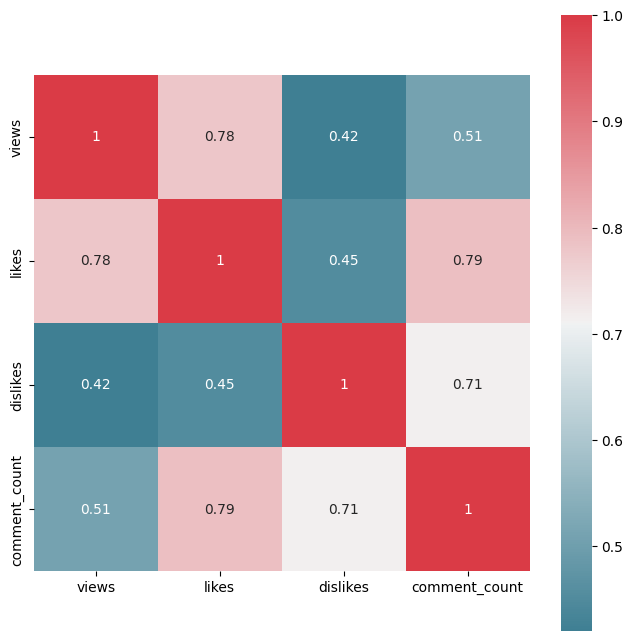

In [78]:
columns_show=['views','likes','dislikes','comment_count']

f, ax = plt.subplots(figsize=(8, 8))
corr = df[columns_show].corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)


---

### Análise do Mapa de Calor de Correlação

O mapa de calor exibe a matriz de correlação para as variáveis 'views', 'likes', 'dislikes' e 'comment_count' do df_unificado do Youtube. Cada célula mostra o coeficiente de correlação entre duas variáveis, variando de -1 a 1, onde 1 indica correlação perfeita positiva, -1 indica correlação perfeita negativa e 0 indica nenhuma correlação.

**Observações Principais**

- **Views e Likes**: Existe uma forte correlação positiva (0.78) entre 'views' e 'likes', o que sugere que vídeos com mais visualizações tendem a receber mais curtidas.

- **Views e Dislikes**: A correlação entre 'views' e 'dislikes' é mais fraca (0.42), mas ainda positiva, indicando que vídeos com mais visualizações podem receber mais dislikes, embora a relação não seja tão forte quanto a de 'likes'.

- **Views e Comment Count**: A correlação de 0.51 entre 'views' e 'comment_count' mostra uma relação positiva moderada, indicando que vídeos mais visualizados tendem a ter mais comentários.

- **Likes e Dislikes**: Existe uma correlação moderada (0.45) entre 'likes' e 'dislikes', o que pode ser interpretado como vídeos que provocam reações também tendem a receber mais reações de ambos os tipos.

- **Likes e Comment Count**: A correlação entre 'likes' e 'comment_count' é forte (0.79), sugerindo que vídeos com muitas curtidas também tendem a ter muitos comentários.

- **Dislikes e Comment Count**: A correlação entre 'dislikes' e 'comment_count' é substancial (0.71), o que pode indicar que vídeos que recebem muitos dislikes também incentivam os usuários a deixarem comentários, possivelmente como forma de expressar descontentamento ou discussão.

**Conclusão**

As métricas de engajamento (likes, dislikes, e comment_count) estão todas positivamente correlacionadas umas com as outras, o que indica que quando um vídeo recebe muita atenção em uma dessas métricas, é provável que receba atenção semelhante nas outras. A variável 'views' está positivamente correlacionada com todas as outras variáveis, reforçando a noção de que a visibilidade de um vídeo está ligada ao seu nível de engajamento.

---



## Análise de Regressão das Métricas de Engajamento no YouTube

Neste segmento da análise, dediquei-me a explorar a relação entre várias métricas de engajamento de vídeos no YouTube, como `likes` (curtidas), `dislikes` (descurtidas), e `comment_count` (contagem de comentários), e como elas influenciam a métrica de `views` (visualizações). O foco foi estabelecer um modelo de regressão linear múltipla para quantificar essas relações e oferecer insights sobre a dinâmica do engajamento dos espectadores.

### Configuração e Resultados do Modelo de Regressão

Utilizando a biblioteca `statsmodels` no Python, construí um modelo de regressão linear múltipla com as seguintes etapas principais:

- **Seleção de Variáveis:** Optei por `views` como a variável dependente, buscando entender como é afetada pelas variáveis independentes `likes`, `dislikes`, e `comment_count`.
- **Correlação entre Variáveis Independentes:** Antes de ajustar o modelo, examinei a correlação entre as variáveis independentes para verificar a multicolinearidade. A análise revelou correlações significativas, mas decidi prosseguir com todas as variáveis para entender seus impactos individuais.
- **Ajuste do Modelo:** Com as variáveis selecionadas, ajustei o modelo de regressão linear, incluindo uma constante para representar o intercepto.
- **Análise dos Resultados:** O modelo apresentou um R-squared de 0.698, indicando que cerca de 70% da variabilidade nas `views` pode ser explicada pelas variáveis de engajamento selecionadas.

### Interpretação dos Coeficientes

- **Likes:** Cada curtida adicional está associada a um aumento de aproximadamente 48 `views`, destacando a importância das curtidas na promoção da visibilidade do vídeo.
- **Dislikes:** De forma surpreendente, cada descurtida também está associada a um aumento nas `views` (aproximadamente 114), sugerindo que o engajamento negativo ainda pode aumentar a exposição do vídeo.
- **Comment Count:** Contrariando as expectativas, um aumento no número de comentários mostrou-se associado a uma diminuição nas `views`. Esse resultado negativo (-176.6779) levanta questões interessantes sobre a natureza do conteúdo que gera muitos comentários.

### Considerações Finais

Esta análise de regressão oferece uma visão valiosa sobre como diferentes formas de engajamento estão relacionadas às visualizações de vídeos no YouTube. Os resultados sublinham a complexidade do engajamento dos espectadores e seu impacto na popularidade dos vídeos. Embora a presença de multicolinearidade e a não normalidade dos resíduos sugiram cautela na interpretação dos coeficientes, o modelo fornece uma base sólida para investigações futuras e estratégias de otimização de conteúdo.

---

In [79]:
import pandas as pd
import statsmodels.api as sm

# Selecionar as variáveis de interesse
df_variaveis = df[['views', 'likes', 'dislikes', 'comment_count']]

# Verificar a correlação entre as variáveis independentes
correlacao = df_variaveis[['likes', 'dislikes', 'comment_count']].corr()
print(correlacao)

# Preparar os dados para a regressão
X = df_variaveis[['likes', 'dislikes', 'comment_count']]  # Variáveis independentes
y = df_variaveis['views']  # Variável dependente

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Ver os resultados do modelo
print(modelo.summary())

                  likes  dislikes  comment_count
likes          1.000000  0.454033        0.79092
dislikes       0.454033  1.000000        0.71262
comment_count  0.790920  0.712620        1.00000
                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 2.795e+05
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:48:51   Log-Likelihood:            -6.0354e+06
No. Observations:              363372   AIC:                         1.207e+07
Df Residuals:                  363368   BIC:                         1.207e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
              

---
# Análise de Cluster dos Vídeos do YouTube - focando nas métricas de engajamento — likes, dislikes e comment_count

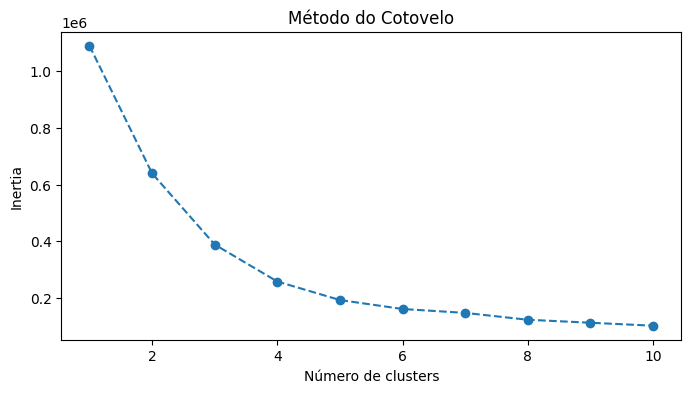

C:\Users\Nayar\AppData\Local\Temp\ipykernel_16856\4225842348.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


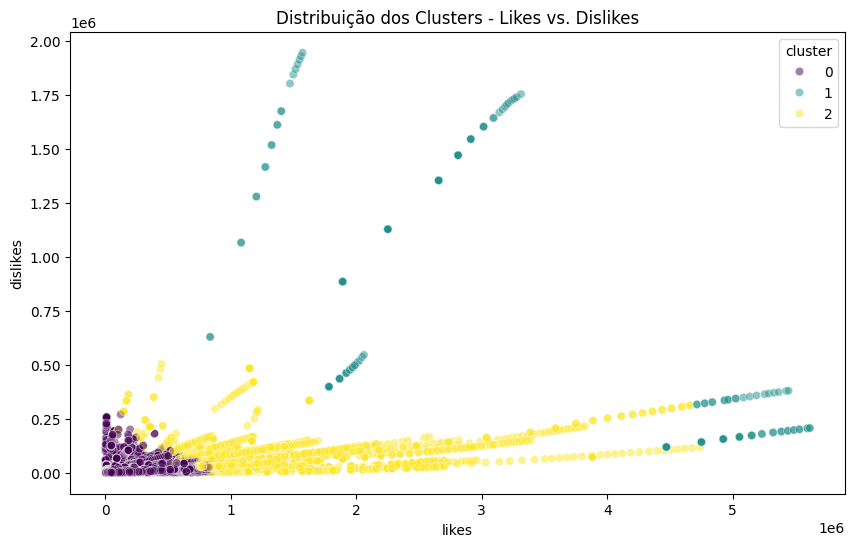

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preparação dos dados
features = df[['likes', 'dislikes', 'comment_count']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Método do Cotovelo para encontrar o k ideal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

# Supondo que o número ótimo de clusters seja 3 (exemplo)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adicionando a informação de cluster ao DataFrame
df['cluster'] = clusters

# Análise dos Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='dislikes', hue='cluster', data=df, palette='viridis', alpha=0.5)
plt.title('Distribuição dos Clusters - Likes vs. Dislikes')
plt.show()


---

### Interpretação do Gráfico do Método do Cotovelo

O gráfico do método do cotovelo apresenta a inércia (uma medida da variação interna dos clusters) em função do número de clusters escolhidos. Podemos observar que a inércia diminui significativamente à medida que aumentamos o número de clusters de 1 para 2 e continua a diminuir, mas em um ritmo mais lento, à medida que adicionamos mais clusters. O "cotovelo" é o ponto em que o ganho marginal em explicar a variância diminui significativamente, o que neste caso parece ser em torno de 3 clusters. Isso sugere que a escolha de 3 clusters é apropriada para o conjunto de dados em questão, pois proporciona um bom equilíbrio entre o número de clusters e a inércia.

### Interpretação do Gráfico de Distribuição dos Clusters

No gráfico de distribuição dos clusters, cada ponto representa um vídeo, com as coordenadas indicando o número de 'likes' (eixo x) e 'dislikes' (eixo y) que o vídeo recebeu. Os pontos são coloridos de acordo com o cluster ao qual pertencem, identificados pelos números 0, 1 e 2.

Podemos interpretar os clusters da seguinte forma:

- **Cluster 0 (azul)**: Este cluster parece conter vídeos com uma quantidade moderada a alta de 'likes' e 'dislikes', sugerindo que são vídeos que geram um nível significativo de engajamento, tanto positivo quanto negativo. Isso pode indicar vídeos polarizadores ou de alto perfil que provocam reações fortes nos espectadores.

- **Cluster 1 (verde)**: Este cluster inclui vídeos que receberam uma quantidade muito alta de 'likes' e 'dislikes', talvez refletindo conteúdo viral ou vídeos de canais muito populares.

- **Cluster 2 (amarelo)**: Este é o maior cluster e inclui vídeos com uma quantidade menor de 'likes' e 'dislikes' em comparação com os outros clusters. Isso pode representar vídeos com engajamento médio ou de canais menos conhecidos.

Note que a escala do eixo y (dislikes) é muito menor do que a do eixo x (likes), o que é comum, pois geralmente os vídeos tendem a receber mais curtidas do que descurtidas. Os clusters parecem se estender principalmente ao longo do eixo x, o que sugere que o número de 'likes' é um diferenciador mais significativo entre os grupos do que o número de 'dislikes'.

### Conclusão

A análise de cluster K-means oferece uma maneira de categorizar vídeos com base em seu engajamento e pode ajudar a identificar padrões de comportamento do público e estratégias de conteúdo. Os resultados podem ser utilizados para direcionar recomendações de conteúdo, estratégias de marketing e identificação de conteúdo de alto desempenho.

---

# DATAVIZ - POWERBI

In [82]:
# Salvar o Dataframe unificado sem duplicatas como um arquivo CSV
df.to_excel('base_dados/df.xlsx', index=False, engine='openpyxl')

In [83]:
# Salvar o DataFrame de categorias concatenado como um arquivo CSV
df_categorias_concatenado.to_csv('base_dados/df_categorias_concatenado.csv', index=False)


---
Vamos concluir essa análise utilizando o POWERBI para extrair os principais insigts da análise, de maneira dinâmica e interativa.

Ao importar os DataFrames tratados e unificados para o Power BI, podemos criar visualizações que destacam os principais insights da nossa análise. Isso inclui distribuição de visualizações, engajamento (likes e dislikes), demografia do espectador, performance de categorias de vídeos, e mais. Com a capacidade de filtrar e segmentar dados em tempo real.

---